## Binning / Discretization

**Load and Preprocess the Titanic Dataset**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

In [3]:
# Fill missing age values with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [4]:
# Encode categorical columns
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'].fillna('S', inplace=True)
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [5]:
# Drop irrelevant columns
X = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
y = titanic['Survived']

In [6]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Base Model Performance without Binning**

In [7]:
# Logistic Regression model without binning
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [8]:
# Accuracy before binning
accuracy_before = accuracy_score(y_test, y_pred)
cross_val_before = cross_val_score(lr, X, y, scoring='accuracy').mean()

print(f"Accuracy before binning: {accuracy_before}")
print(f"Cross-validation accuracy before binning: {cross_val_before}")

Accuracy before binning: 0.7988826815642458
Cross-validation accuracy before binning: 0.7934906785512524


**Apply Different Binning Techniques**

**(a) Equal Width Binning**

In [10]:
# Equal width binning on Age column
X_train['Age_bin_equal_width'] = pd.cut(X_train['Age'], bins=10, labels=False)
X_test['Age_bin_equal_width'] = pd.cut(X_test['Age'], bins=10, labels=False)

# Logistic Regression with Equal Width Binning
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy after equal width binning
accuracy_equal_width = accuracy_score(y_test, y_pred)
cross_val_equal_width = cross_val_score(lr, X, y, scoring='accuracy').mean()

print(f"Accuracy after Equal Width Binning: {accuracy_equal_width}")
print(f"Cross-validation accuracy after Equal Width Binning: {cross_val_equal_width}")

Accuracy after Equal Width Binning: 0.8044692737430168
Cross-validation accuracy after Equal Width Binning: 0.7934906785512524


**(b) Equal Frequency Binning**

In [16]:
# Equal frequency binning on Age column
X_train['Age_bin_equal_freq'] = pd.qcut(X_train['Age'], q=5, labels=False, duplicates='drop')
X_test['Age_bin_equal_freq'] = pd.qcut(X_test['Age'], q=5, labels=False, duplicates='drop')


# Logistic Regression with Equal Frequency Binning
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy after equal frequency binning
accuracy_equal_freq = accuracy_score(y_test, y_pred)
cross_val_equal_freq = cross_val_score(lr, X, y, scoring='accuracy').mean()

print(f"Accuracy after Equal Frequency Binning: {accuracy_equal_freq}")
print(f"Cross-validation accuracy after Equal Frequency Binning: {cross_val_equal_freq}")

Accuracy after Equal Frequency Binning: 0.8156424581005587
Cross-validation accuracy after Equal Frequency Binning: 0.7934906785512524


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**(c) K-Means Binning**

In [14]:
from sklearn.cluster import KMeans
import numpy as np

# K-Means binning on Age column
kmeans = KMeans(n_clusters=10)
X_train['Age_bin_kmeans'] = kmeans.fit_predict(np.array(X_train['Age']).reshape(-1, 1))
X_test['Age_bin_kmeans'] = kmeans.predict(np.array(X_test['Age']).reshape(-1, 1))

# Logistic Regression with K-Means Binning
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy after k-means binning
accuracy_kmeans = accuracy_score(y_test, y_pred)
cross_val_kmeans = cross_val_score(lr, X, y, scoring='accuracy').mean()

print(f"Accuracy after K-Means Binning: {accuracy_kmeans}")
print(f"Cross-validation accuracy after K-Means Binning: {cross_val_kmeans}")

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy after K-Means Binning: 0.8044692737430168
Cross-validation accuracy after K-Means Binning: 0.7934906785512524


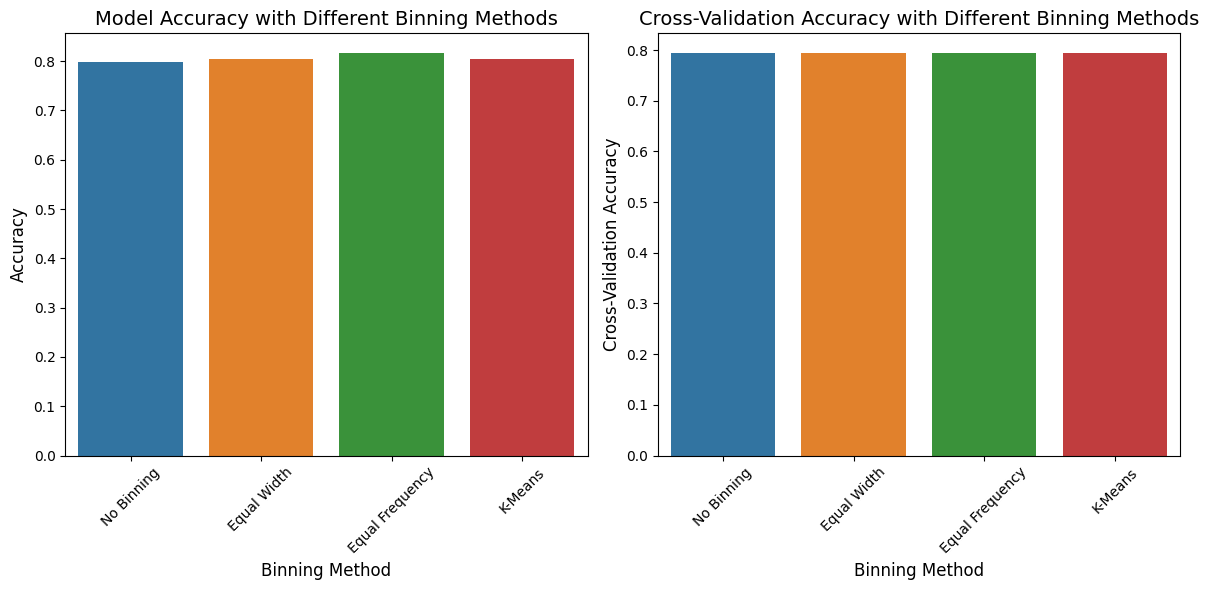

In [18]:
# Store the results
binning_methods = ['No Binning', 'Equal Width', 'Equal Frequency', 'K-Means']
accuracy_scores = [accuracy_before, accuracy_equal_width, accuracy_equal_freq, accuracy_kmeans]
cv_scores = [cross_val_before, cross_val_equal_width, cross_val_equal_freq, cross_val_kmeans]

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame({
    'Binning Method': binning_methods,
    'Accuracy': accuracy_scores,
    'Cross-Validation Accuracy': cv_scores
})

# Plotting the accuracy and cross-validation scores for comparison
plt.figure(figsize=(12, 6))

# Plot for Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x='Binning Method', y='Accuracy', data=results_df, hue='Binning Method', dodge=False, legend=False)
plt.title('Model Accuracy with Different Binning Methods', fontsize=14)
plt.xlabel('Binning Method', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45)

# Plot for Cross-Validation Accuracy
plt.subplot(1, 2, 2)
sns.barplot(x='Binning Method', y='Cross-Validation Accuracy', data=results_df, hue='Binning Method', dodge=False, legend=False)
plt.title('Cross-Validation Accuracy with Different Binning Methods', fontsize=14)
plt.xlabel('Binning Method', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Binarizer

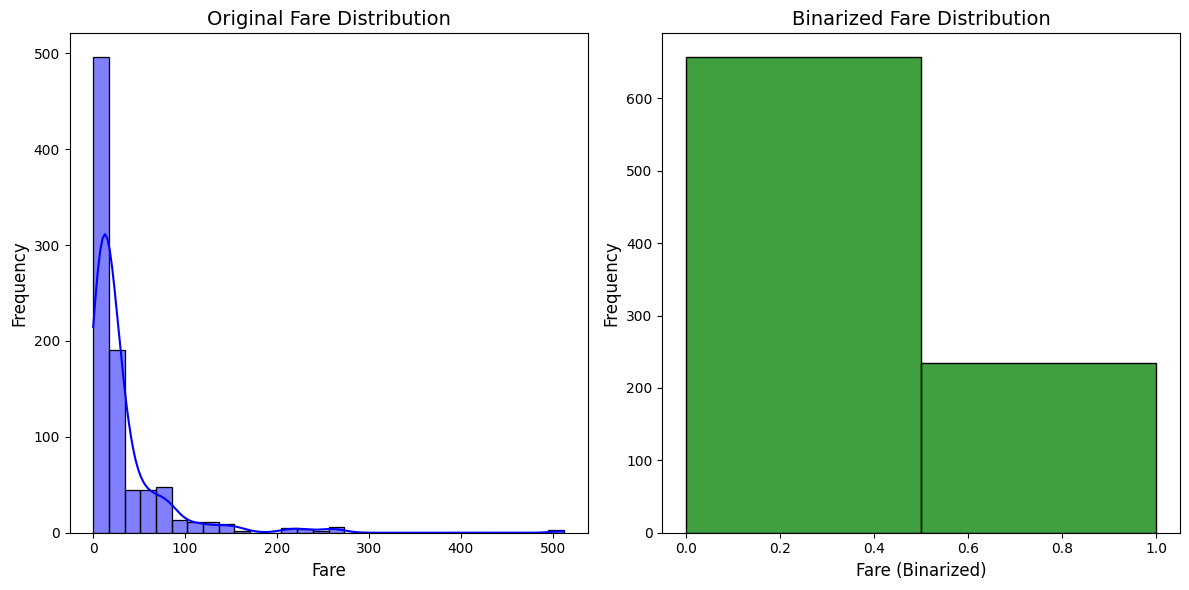

In [20]:
from sklearn.preprocessing import Binarizer

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# We'll use the 'fare' feature for binarization
fare_data = titanic[['fare']].dropna()

# Initialize the Binarizer with a threshold of 30 (arbitrary threshold)
binarizer = Binarizer(threshold=30)

# Apply the Binarizer
fare_data['Fare_Binarized'] = binarizer.fit_transform(fare_data[['fare']])

# Plot the original 'Fare' distribution
plt.figure(figsize=(12, 6))

# Plot 1: Original Fare distribution
plt.subplot(1, 2, 1)
sns.histplot(fare_data['fare'], bins=30, kde=True, color='blue')
plt.title('Original Fare Distribution', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot 2: Binarized Fare distribution
plt.subplot(1, 2, 2)
sns.histplot(fare_data['Fare_Binarized'], bins=2, kde=False, color='green')
plt.title('Binarized Fare Distribution', fontsize=14)
plt.xlabel('Fare (Binarized)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()